In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions

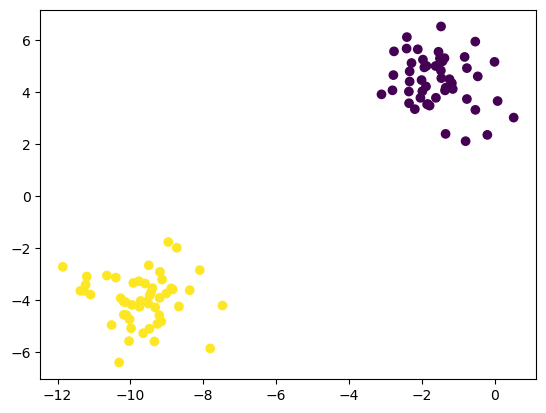

In [11]:
np.random.seed(1)
X, y = make_blobs(centers=2, cluster_std=1, random_state=1)
weights = np.random.rand(3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [12]:
alfa = 0.01
epoch = 100

In [13]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, epochs=50, verbose=False):
        self.verbose = verbose
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sum(self, X):
        return np.dot(X, self._weights) + self._bias

    def _activation(self, m):
        return np.where(m>=0.0, 1,-1)

    def fit(self, X, y):
        self._bias = np.random.uniform(-1,1)
        self._weights = np.random.uniform(-1,1,(X.shape[1]))
        self._errors = []
        for epoch in range(self.epochs):
            erros = 0
            for x, target in zip(X,y):
                output = self.predict(x)
                update = self.learning_rate * (target-output)
                self._bias += update
                self._weights += update * x
                erros += int(update!=0.0)
            self._errors.append(erros)
        return self
    def predict(self,X):
        return self._activation(self._sum(X))

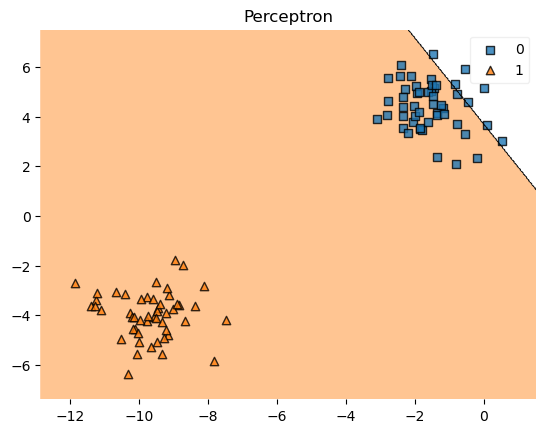

In [14]:
percp = Perceptron(epochs = epoch, learning_rate=alfa)
percp.fit(X,y)
plot_decision_regions(X,y,clf=percp)
plt.title('Perceptron')
plt.show()